## GA implementado para resolver ATSP

In [41]:
__author__ = "Marcelo Gallegos"

In [21]:
import numpy as np
import random
import os
import operator
import pandas as pd
import matplotlib.pyplot as plt

In [22]:
mainpath = os.getcwd()

#
mDistancia = pd.read_csv(mainpath + '\ExampleInstance' + '.txt',delim_whitespace=True, header = None)

In [23]:
class Fitness:
    def __init__(self, circuito):
        self.circuito = circuito
        self.distancia = 0
        self.fitness= 0.0
    
    def circuitoDistancia(self):
        if self.distancia ==0:
            rutaDistancia = 0
            for i in range(0, len(self.circuito)):
                desdeNodo = self.circuito[i]
                haciaNodo = None
                if i + 1 < len(self.circuito):
                    haciaNodo = self.circuito[i + 1]
                else:
                    haciaNodo = self.circuito[0]
                rutaDistancia += desdeNodo.distancia(haciaNodo)
            self.distancia = rutaDistancia
        return self.distancia
    
    def circuitoFitness(self):
        if self.fitness == 0:
            self.fitness = 1 / float(self.circuitoDistancia())
        return self.fitness

In [24]:
def crearCircuito(ListaNodo):
    circuito = random.sample(ListaNodo, len(ListaNodo))
    return circuito

In [25]:
def rankearCircuito(poblacion):
    t_fitness = {}
    for i in range(0,len(poblacion)):
        t_fitness[i] = Fitness(poblacion[i]).circuitoFitness()
    return sorted(t_fitness.items(), key = operator.itemgetter(1), reverse = True)

In [26]:
class Nodo:
    def __init__(self, n):
        self.n = n
    
    def distancia(self, nodo):
        i = self.n
        j = nodo.n
        distancia = mDistancia[i][j]
        return distancia
    
    def __repr__(self):
        return "Nodo:" + str(self.n+1)

In [27]:
def poblacionInicial(n_Poblacion, ListaNodo):
    poblacion = []

    for i in range(0, n_Poblacion):
        poblacion.append(crearCircuito(ListaNodo))
    return poblacion

In [28]:
def Seleccion(poblacionOrdenada, n_Elite):
    Resultado = []
    df = pd.DataFrame(np.array(poblacionOrdenada), columns=["Index","Fitness"])
    df['cum_sum'] = df.Fitness.cumsum()
    df['cum_perc'] = 100*df.cum_sum/df.Fitness.sum()
    
    for i in range(0, n_Elite):
        Resultado.append(poblacionOrdenada[i][0])
    for i in range(0, len(poblacionOrdenada) - n_Elite):
        seleccion = 100*random.random()
        for i in range(0, len(poblacionOrdenada)):
            if seleccion <= df.iat[i,3]:
                Resultado.append(poblacionOrdenada[i][0])
                break
    return Resultado

In [29]:
def Cruzamiento(poblacion, Resultado):
    Cruzamiento = []
    for i in range(0, len(Resultado)):
        index = Resultado[i]
        Cruzamiento.append(poblacion[index])
    return Cruzamiento

In [30]:
def Descendencia(Padre_a, Padre_b):
    Hijo = []
    HijoPadre_a = []
    HijoPadre_b = []
    
    genPadre_a = int(random.random() * len(Padre_a))
    genPadre_b = int(random.random() * len(Padre_b))
    
    GenInicio = min(genPadre_a, genPadre_b)
    GenTermino = max(genPadre_a, genPadre_b)

    for i in range(GenInicio, GenTermino):
        HijoPadre_a.append(Padre_a[i])
    HijoPadre_b = [item for item in Padre_b if item not in HijoPadre_a]

    Hijo = HijoPadre_a + HijoPadre_b
    return Hijo

In [31]:
def DescendenciaPoblacion(Cruzamiento, n_Elite):
    Hijos = []
    length = len(Cruzamiento) - n_Elite
    pool = random.sample(Cruzamiento, len(Cruzamiento))
    for i in range(0, n_Elite):
        Hijos.append(Cruzamiento[i])
    
    for i in range(0, length):
        Hijo = Descendencia(pool[i], pool[len(Cruzamiento)-i-1])
        Hijos.append(Hijo)
    return Hijos

In [32]:
def Mutacion(Individuo, p_Mutacion):
    for cruzado1 in range(len(Individuo)):
        if(random.random() < p_Mutacion):
            cruzado2 = int(random.random() * len(Individuo))
            
            Nodo1 = Individuo[cruzado1]
            Nodo2 = Individuo[cruzado2]
            
            Individuo[cruzado1] = Nodo2
            Individuo[cruzado2] = Nodo1
    return Individuo

In [33]:
def MutacionPoblacion(poblacion, p_Mutacion):
    PoblacionMutada = []
    
    for ind in range(0, len(poblacion)):
        IndividuoMutado = Mutacion(poblacion[ind], p_Mutacion)
        PoblacionMutada.append(IndividuoMutado)
    return PoblacionMutada

In [34]:
def GeneracionDescendiente(Cromosoma, n_Elite, p_Mutacion):
    PoblacionOrdenada = rankearCircuito(Cromosoma)
    Resultado = Seleccion(PoblacionOrdenada, n_Elite)
    Cruza = Cruzamiento(Cromosoma, Resultado)
    Hijos = DescendenciaPoblacion(Cruza, n_Elite)
    Descendientes = MutacionPoblacion(Hijos, p_Mutacion)
    return Descendientes

In [35]:
def Algoritmo(poblacion, n_Poblacion, n_Elite, p_Mutacion, generaciones):
    ga_poblacion = poblacionInicial(n_Poblacion, poblacion)
    print("Distancia Inicial: " + str(1 / rankearCircuito(ga_poblacion)[0][1]))
    
    for i in range(0, generaciones):
        ga_poblacion = GeneracionDescendiente(ga_poblacion, n_Elite, p_Mutacion)
    
    print("Distancia Final (Solucion): " + str(1 / rankearCircuito(ga_poblacion)[0][1]))
    mejorCircuitoIndex = rankearCircuito(ga_poblacion)[0][0]
    mejorCircuito = ga_poblacion[mejorCircuitoIndex]
    return mejorCircuito

In [36]:
ListaNodo = []

for j in range(0,len(mDistancia)):
    ListaNodo.append(Nodo(n=j))

Parámetros

In [37]:
poblacion = ListaNodo #This parameter is automatically defined with "ListaNodo".
n_Poblacion = 200 #Population size to generate / iterate.
n_Elite = 40 #Size of the set of individuals selected under elitist criteria in each generation.
p_Mutacion = 0.001 #Mutation Probability of the offspring of each generation (1% = 0.01)
generaciones = 800 #Number of generations

Ejecución y Resultado

In [38]:
Algoritmo(poblacion, n_Poblacion, n_Elite, p_Mutacion, generaciones)

Distancia Inicial: 4695.0
Distancia Final (Solucion): 2128.0


[Nodo:109,
 Nodo:7,
 Nodo:188,
 Nodo:191,
 Nodo:86,
 Nodo:27,
 Nodo:56,
 Nodo:156,
 Nodo:19,
 Nodo:37,
 Nodo:31,
 Nodo:128,
 Nodo:186,
 Nodo:159,
 Nodo:147,
 Nodo:20,
 Nodo:179,
 Nodo:39,
 Nodo:74,
 Nodo:69,
 Nodo:196,
 Nodo:23,
 Nodo:33,
 Nodo:32,
 Nodo:47,
 Nodo:77,
 Nodo:180,
 Nodo:176,
 Nodo:131,
 Nodo:15,
 Nodo:195,
 Nodo:106,
 Nodo:76,
 Nodo:16,
 Nodo:198,
 Nodo:138,
 Nodo:18,
 Nodo:199,
 Nodo:98,
 Nodo:28,
 Nodo:26,
 Nodo:30,
 Nodo:49,
 Nodo:150,
 Nodo:6,
 Nodo:70,
 Nodo:72,
 Nodo:187,
 Nodo:126,
 Nodo:60,
 Nodo:140,
 Nodo:54,
 Nodo:53,
 Nodo:48,
 Nodo:50,
 Nodo:67,
 Nodo:8,
 Nodo:13,
 Nodo:161,
 Nodo:170,
 Nodo:166,
 Nodo:116,
 Nodo:139,
 Nodo:59,
 Nodo:158,
 Nodo:90,
 Nodo:97,
 Nodo:22,
 Nodo:29,
 Nodo:58,
 Nodo:160,
 Nodo:169,
 Nodo:194,
 Nodo:192,
 Nodo:129,
 Nodo:136,
 Nodo:125,
 Nodo:122,
 Nodo:123,
 Nodo:181,
 Nodo:182,
 Nodo:95,
 Nodo:94,
 Nodo:93,
 Nodo:91,
 Nodo:81,
 Nodo:24,
 Nodo:63,
 Nodo:175,
 Nodo:171,
 Nodo:174,
 Nodo:45,
 Nodo:52,
 Nodo:71,
 Nodo:61,
 Nodo:121,


Representación gráfica (Distancia del circuito vs Generación)

In [39]:
def AlgoritmoPlot(poblacion, n_Poblacion, n_Elite, p_Mutacion, generaciones):
    plotPoblacion = poblacionInicial(n_Poblacion, poblacion)
    progreso = []
    progreso.append(1 / rankearCircuito(plotPoblacion)[0][1])
    
    for k in range(0, generaciones):
        plotPoblacion = GeneracionDescendiente(plotPoblacion, n_Elite, p_Mutacion)
        progreso.append(1 / rankearCircuito(plotPoblacion)[0][1])

    plt.plot(progreso)
    plt.ylabel('Distancia de Circuito')
    plt.xlabel('Generacion')
    plt.savefig("Grafico.png") #Unblock if you want create a copy of the graph image in the folder
    plt.show()

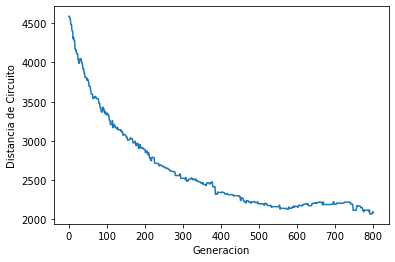

In [40]:
AlgoritmoPlot(poblacion, n_Poblacion, n_Elite, p_Mutacion, generaciones)